In [858]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
plt.style.use('ggplot')

In [859]:
df = pd.read_csv("Train_Data.csv")

In [860]:
#EDA
df.head(50)


,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,average_review_rating
0,7f890f73298badd692c39c3801ef1d28,Batman - Role Play - Cowl and Batarang,Mattel,£14.99,NaN,4,1.0,Figures & Playsets > Science Fiction & Fantasy,http://www.amazon.co.uk/Rubies-Costume-Co-Flas...,"When kids aspire to be like Batman, it's easy ...",Technical Details Item Weight113 g Product Dim...,"When kids aspire to be like Batman, it's easy ...",http://www.amazon.co.uk/Rubies-Costume-Co-Flas...,NaN,Item was broken // 3.0 // 2 April 2014 // By\n...,"{""seller""=>{""Seller_name_1""=>""a1 Toys"", ""Selle...",4.5
1,83e55a2edb6c13dfc1c46d1577321b2e,Doctor Who 12-inch 50th Anniversary Collector ...,Dr Who,NaN,3 new,73,NaN,Figures & Playsets > Science Fiction & Fantasy,http://www.amazon.co.uk/Doctor-Who-Classic-Dal...,Product Description This ultimate Doctor Who c...,Technical Details Item Weight1.4 Kg Product Di...,Product Description This ultimate Doctor Who c...,http://www.amazon.co.uk/Dr-Who-Dalek-Projectio...,NaN,A wonderful collectors piece // 5.0 // 31 Aug....,NaN,4.6
2,4bfaaf6558582a0f337ad59fcd51fcf7,Melissa & Doug Sticker Collection - Pink,Melissa & Doug,£4.76,15 new,47,1.0,Arts & Crafts > Paper & Stickers,http://www.amazon.co.uk/Melissa-Doug-Sticker-C...,"Product Description Cute couture, adorable ani...",Technical Details Item Weight299 g Product Dim...,"Product Description Cute couture, adorable ani...",http://www.amazon.co.uk/Melissa-Doug-Habitats-...,NaN,Great sticker collection // 5.0 // 19 Jun. 201...,NaN,4.7
3,4e6702cb7fe9278f16dedc39a8808c72,"Rock and Roll Cards, 30 Team",ClubKing Ltd,£4.49,2 new,2,1.0,Hobbies > Trading Cards & Accessories > Packs ...,http://www.amazon.co.uk/ClubKing-Ltd-Football-...,"1 Pack of 25 Football Cards, 30 rockstars on e...",Technical Details Item Weight100 g Product Dim...,"1 Pack of 25 Football Cards, 30 rockstars on e...",http://www.amazon.co.uk/ClubKing-Ltd-Football-...,how many cards in a pack it dosn't say..?? // ...,Rock and roll cards // 5.0 // 28 July 2013 // ...,"{""seller""=>[{""Seller_name_1""=>""ClubKing Ltd"", ...",5.0
4,f505611d18b0ae98258896ae1b0f14c8,Crayola 16 Pipsqueak Glitter Glues,Crayola,£5.99,9 new,10,1.0,Characters & Brands > Crayola,http://www.amazon.co.uk/Crayola-3-3542-9-Glitt...,Product Description 16 Pipsqueak washable glit...,Technical Details Item Weight186 g Product Dim...,Product Description 16 Pipsqueak washable glit...,http://www.amazon.co.uk/Crayola-3-3542-9-Glitt...,NaN,Little fingers big imagination // 5.0 // 4 Mar...,"{""seller""=>[{""Seller_name_1""=>""BIC WAREHOUSE"",...",4.2
5,7e3e6576619a0176eb79a5cd223736b1,MANDALORIAN SUPER COMMANDO - LEGO Star Wars Mi...,Star Wars,£11.95,NaN,1,1.0,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/LEGO-Star-Wars-75022-M...,LEGO Star Wars Minifigure. Brand New minifigur...,Technical Details Item Weight9 g Product Dimen...,LEGO Star Wars Minifigure. Brand New minifigur...,http://www.amazon.co.uk/LEGO-Star-Wars-75022-M...,NaN,Four Stars // 4.0 // 25 Feb. 2015 // By\n \...,NaN,4.0
6,c35b328508f9a21be58ff3f8e94d32fa,Revell 1:72 Scale Australian Infantry WWII,Revell-Monogram,£8.39,5 new,1,NaN,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Italeri-WW2-German-Inf...,Product Description As a member of the British...,Technical Details Item Weight118 g Product Dim...,Product Description As a member of the British...,http://www.amazon.co.uk/Revell-02529-Scale-Anz...,NaN,"good poses, no problems with additional flash ...",NaN,5.0
7,3d86947e8dd06913b4047ebc45363473,The Muppets: Animal Metallic Wacky Wobbler SDC...,FunKo,NaN,2 new,1,1.0,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/FunKo-2629-Funko-Mu

In [861]:
df.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                           object
number_available_in_stock                       object
number_of_reviews                               object
number_of_answered_questions                   float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
average_review_rating                          float64
dtype: object

In [862]:
df.shape

(7486, 17)

In [863]:
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      5
price                                          1069
number_available_in_stock                      1899
number_of_reviews                                 0
number_of_answered_questions                    577
amazon_category_and_sub_category                486
customers_who_bought_this_item_also_bought      821
description                                     473
product_information                              45
product_description                             473
items_customers_buy_after_viewing_this_item    2307
customer_questions_and_answers                 6817
customer_reviews                                  3
sellers                                        2314
average_review_rating                             0
dtype: int64

In [864]:
df.nunique()

uniq_id                                        7486
product_name                                   7466
manufacturer                                   2254
price                                          2188
number_available_in_stock                        81
number_of_reviews                               168
number_of_answered_questions                     18
amazon_category_and_sub_category                237
customers_who_bought_this_item_also_bought     6534
description                                    6454
product_information                            7438
product_description                            6454
items_customers_buy_after_viewing_this_item    5046
customer_questions_and_answers                  667
customer_reviews                               7437
sellers                                        4941
average_review_rating                            17
dtype: int64

In [865]:
#After data eyeballing few columns will not help in implementing the model,so we should get rid of them
df.drop(columns= ["uniq_id","product_name","customers_who_bought_this_item_also_bought","product_description","product_information","items_customers_buy_after_viewing_this_item","customer_questions_and_answers","sellers","description","manufacturer"] ,inplace=True,axis=1)

In [866]:
df.head(5)

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customer_reviews,average_review_rating
0,£14.99,NaN,4,1.0,Figures & Playsets > Science Fiction & Fantasy,Item was broken // 3.0 // 2 April 2014 // By\n...,4.5
1,NaN,3 new,73,NaN,Figures & Playsets > Science Fiction & Fantasy,A wonderful collectors piece // 5.0 // 31 Aug....,4.6
2,£4.76,15 new,47,1.0,Arts & Crafts > Paper & Stickers,Great sticker collection // 5.0 // 19 Jun. 201...,4.7
3,£4.49,2 new,2,1.0,Hobbies > Trading Cards & Accessories > Packs ...,Rock and roll cards // 5.0 // 28 July 2013 // ...,5.0
4,£5.99,9 new,10,1.0,Characters & Brands > Crayola,Little fingers big imagination // 5.0 // 4 Mar...,4.2


In [867]:
df.isna().sum()

price                               1069
number_available_in_stock           1899
number_of_reviews                      0
number_of_answered_questions         577
amazon_category_and_sub_category     486
customer_reviews                       3
average_review_rating                  0
dtype: int64

In [868]:
#Data preprocessing 
def price_clean(df):
    '''This function will take in the dataframe and perform data cleaning on the price column,
    which includes :-
    1. removing the £ sign
    2. removing any other characters like - and , 
    4. imputing NaN with mean
    5. Typecasting the data type to float'''
    df.price.replace(np.nan,"nan",inplace=True)
    new_price = []
    df.price = df.price.astype(str)
    for price in df.price:
        if price!="nan":
            temp = price.split("£")[1]
            temp2 = re.findall(r'[^-,]',temp)
            new_price.append("".join(temp2))
        else:
            new_price.append("nan")
    df.price = new_price
    df.price.replace("nan",np.nan,inplace=True)
    df.price = df.price.astype("float")
    df.price.replace(np.nan,df.price.mean(),inplace=True)
    return df

    
    

In [869]:
def number_av_in_stock_clean(df):
    '''This function will take in the dataframe and perform data cleaning on the number_available_in_stock column,
    which includes :-
    1. removing the character in the beginning
    2. removing any other characters like - and , 
    4. imputing NaN with mean values
    5. typecasting the data to float type'''
    df.number_available_in_stock.replace(np.nan,"nan",inplace=True)
    new_stock = []
    df.number_available_in_stock = df.number_available_in_stock.astype(str)
    for stock in df.number_available_in_stock:
        if stock!="nan":
            temp = stock.split()[0]
            temp2 = re.findall(r'[^-,]',temp)
            new_stock.append("".join(temp2))
        else:
            new_stock.append("nan")
    df.number_available_in_stock = new_stock
    df.number_available_in_stock.replace("nan",np.nan,inplace=True)
    df.number_available_in_stock = df.number_available_in_stock.astype("float")
    df.number_available_in_stock.replace(np.nan,df.number_available_in_stock.mean(),inplace=True)
    return df

    
    


In [870]:
def number_of_reviews_clean(df):
    '''From eyeballing i found that few data contain ",", so to typecast 
       it into integer type we will need to remove the "," as done in this functon'''
    df.number_of_reviews = df.number_of_reviews.astype("str")
    review = []
    for Num_rev in df.number_of_reviews:
        temp = re.findall(r'[^,-]',Num_rev)
        review.append("".join(temp))
    df.number_of_reviews = review
    df.number_of_reviews = df.number_of_reviews.astype("int")
    return (df)
        
        

In [871]:
def number_of_answered_questions_clean(df):
    '''Imputing the nan values with median'''
    df.number_of_answered_questions.replace(np.nan,df.number_of_answered_questions.median(),inplace= True)
    return (df)
    

In [872]:
def amazon_category_and_sub_category_clean(df):
    '''Replacing the null values by mode and performing a bit of cleaning'''
    new_cat = []
    df.amazon_category_and_sub_category.replace(np.nan,df.amazon_category_and_sub_category.mode()[0],inplace= True)
    df.amazon_category_and_sub_category =  df.amazon_category_and_sub_category.astype("str")
    for cat in df.amazon_category_and_sub_category:
        temp = cat.split(">")[0]
        new_cat.append(temp)
    df.amazon_category_and_sub_category = new_cat
    
    return(df)
        
        
    

In [873]:
def customer_reviews_clean(df):
    '''This function will extract all the review values using regular expression'''
    df.customer_reviews = df.customer_reviews.astype("str")
    lst_of_reviews = ["0.0","1.0","2.0","3.0","4.0","5.0"]
    rev = []
    for CR in df.customer_reviews:
        rat = []              
        for CR_ele in CR.split("//"):
            if CR_ele.strip() in lst_of_reviews:
                rat.append(float(CR_ele))
        if len(rat)!=0:
            rev.append(sum(rat)/len(rat))
        else:
            rev.append(0)
    df.customer_reviews = rev
    return (df)
            

In [874]:
#Applyting the preprocessing to the values
df= amazon_category_and_sub_category_clean(df)
df = number_of_answered_questions_clean(df)
df = number_of_reviews_clean(df)
df = number_av_in_stock_clean(df)
df = price_clean(df)
df = customer_reviews_clean(df)

In [875]:
df.head(50)

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customer_reviews,average_review_rating
0,14.990000,7.800072,4,1.0,Figures & Playsets,4.500000,4.5
1,20.292459,3.000000,73,1.0,Figures & Playsets,4.666667,4.6
2,4.760000,15.000000,47,1.0,Arts & Crafts,4.500000,4.7
3,4.490000,2.000000,2,1.0,Hobbies,5.000000,5.0
4,5.990000,9.000000,10,1.0,Characters & Brands,3.600000,4.2
5,11.950000,7.800072,1,1.0,Characters & Brands,4.000000,4.0
6,8.390000,5.000000,1,1.0,Die-Cast & Toy Vehicles,5.000000,5.0
7,20.292459,2.000000,1,1.0,Hobbies,4.000000,4.0
8,3.990000,1.000000,3,13.0,Die-Cast & Toy Vehicles,4.666667,4.7
9,20.292459,1.000000,4,1.0,Die-Cast & Toy Vehicles,4.500000,4.5


In [876]:
#Visualisation of pre-processed data

In [877]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,7486.0,20.292459,45.190777,0.29,5.95,12.99,20.292459,2439.92
number_available_in_stock,7486.0,7.800072,7.402393,1.00,3.00,7.00,7.800072,92.00
number_of_reviews,7486.0,9.023778,32.959686,1.00,1.00,2.00,6.000000,1399.00
number_of_answered_questions,7486.0,1.776516,2.471132,1.00,1.00,1.00,2.000000,39.00
customer_reviews,7486.0,4.685678,0.437420,0.00,4.50,5.00,5.000000,5.00
average_review_rating,7486.0,4.707561,0.371987,3.00,4.50,5.00,5.000000,5.00


Text(0.5, 1.0, 'Correlation Heatmap')

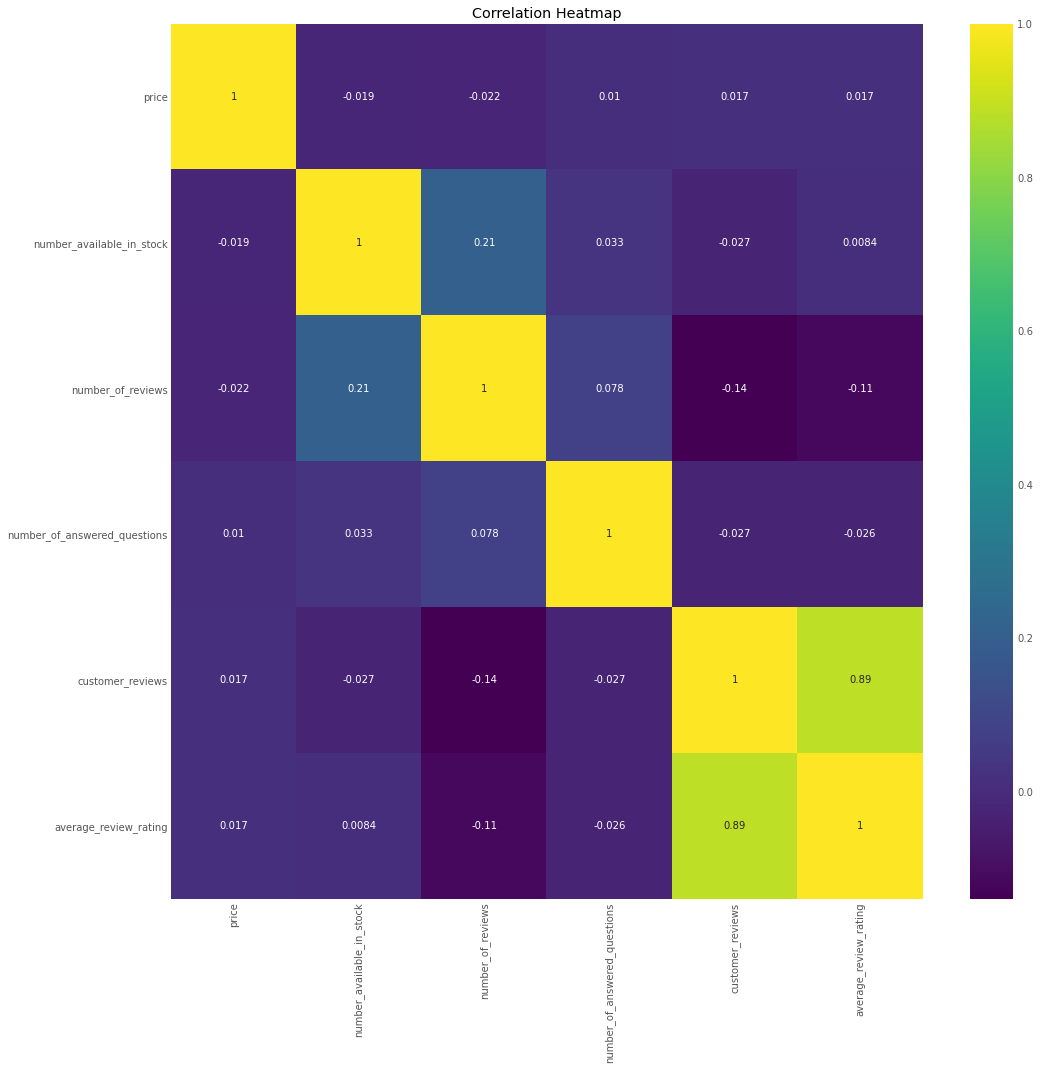

In [878]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap="viridis",annot=True);
plt.title("Correlation Heatmap")

<Figure size 2160x2160 with 0 Axes>

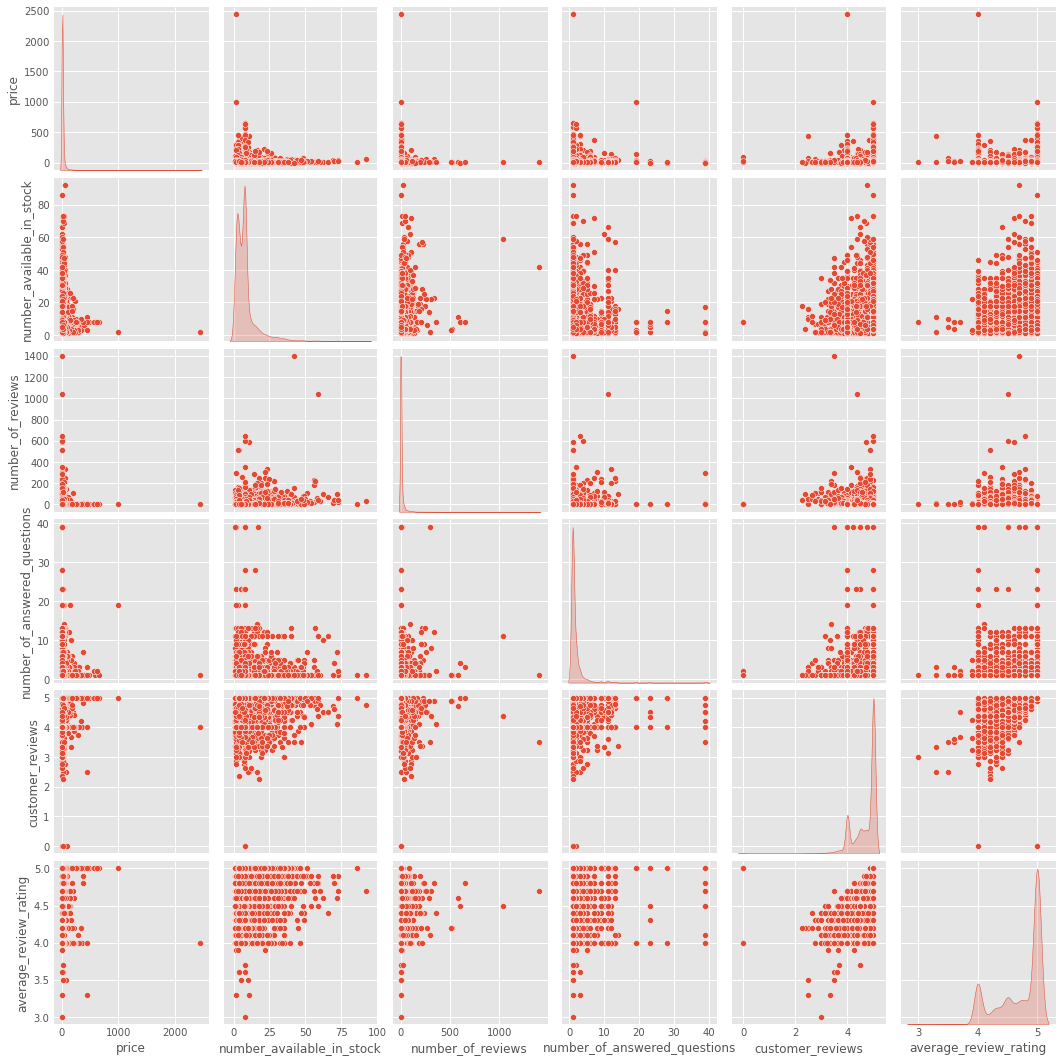

In [879]:
plt.figure(figsize=(30,30))
sns.pairplot(data = df,diag_kind="kde");

Text(0, 0.5, 'Counts')

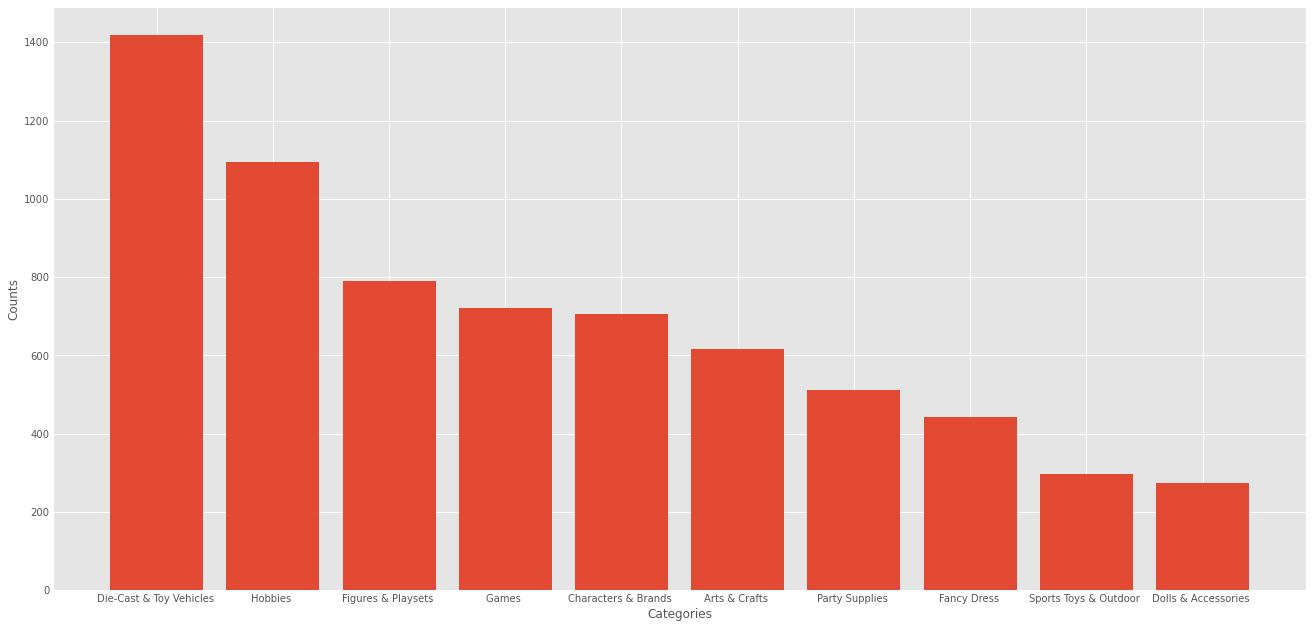

In [880]:
plt.figure(figsize=(20,10))
plt.bar(x=df.amazon_category_and_sub_category.value_counts().index[0:10],height=df.amazon_category_and_sub_category.value_counts()[0:10])
plt.xlabel("Categories")
plt.ylabel("Counts")

In [881]:
RMSE = []

In [882]:
#Getting the dataset ready
Y = df["average_review_rating"]
X = df.drop("average_review_rating",axis=1)

In [883]:
X.drop("amazon_category_and_sub_category",inplace=True,axis=1)

In [884]:
X = preprocessing.scale(X)
X = pd.DataFrame(X)

In [885]:
#train and test split of the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.33,random_state=1)

In [886]:
#Linear Regression model
LR = LinearRegression()
LR.fit(X_train,Y_train)
pred = LR.predict(X_test)
RMSE_LR = np.sqrt(metrics.mean_squared_error(Y_test,pred))

In [887]:
RMSE_LR

0.18231701894929073

In [888]:
#polynomial regression of degree 2
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
LR2 = LinearRegression()
LR2.fit(X_poly,Y_train)
pred2 = LR2.predict(poly_reg.fit_transform(X_test))
RMSE_LR2 = np.sqrt(metrics.mean_squared_error(Y_test,pred2))

In [889]:
RMSE_LR2

0.18134231221575275

In [890]:
#Ridge regressor 
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]
ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)
pred3 = ridge_pipe.predict(X_test)
RMSE_RR = np.sqrt(metrics.mean_squared_error(Y_test,pred3))

In [891]:
RMSE_RR

0.1812882774953921

In [892]:
#Lasso Regressor
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, Y_train)
pred4 = lasso_pipe.predict(X_test)
RMSE_Lasso = np.sqrt(metrics.mean_squared_error(Y_test,pred4))

In [893]:
RMSE_Lasso

0.14503044638337365

In [894]:
#RandomForest regressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, Y_train.ravel())
pred5 = regressor_rf.predict(X_test)
RMSE_RF = np.sqrt(metrics.mean_squared_error(Y_test,pred5))

In [895]:
RMSE_RF

0.11189876116768442

In [896]:
RMSE = [RMSE_LR,RMSE_LR2,RMSE_RR,RMSE_Lasso,RMSE_RF]
Models = ["Linear Regressor","Polynomial Regressor","Ridge Regressor","Lasso Regressor","Random Forest Regressor"] 

In [897]:
pd.DataFrame({"Models":Models,"RMSE values":RMSE})

,Models,RMSE values
0,Linear Regressor,0.182317
1,Polynomial Regressor,0.181342
2,Ridge Regressor,0.181288
3,Lasso Regressor,0.145030
4,Random Forest Regressor,0.111899


In [898]:
#Hence we choose random regressor model

In [919]:
#importing the test data 
df2 = pd.read_csv("Test_Data.csv")

In [920]:
#performing preprocessing
df2.drop(columns= ["uniq_id","product_name","customers_who_bought_this_item_also_bought","product_description","product_information","items_customers_buy_after_viewing_this_item","customer_questions_and_answers","sellers","description","manufacturer","amazon_category_and_sub_category"] ,inplace=True,axis=1)
df2 = number_of_answered_questions_clean(df2)
df2 = number_of_reviews_clean(df2)
df2 = number_av_in_stock_clean(df2)
df2 = price_clean(df2)
df2 = customer_reviews_clean(df2)
df2 = preprocessing.scale(df2)
df2 = pd.DataFrame(df2)

In [922]:
#Using the random forest regressor
pred_final = regressor_rf.predict(df2)


In [939]:
#rounding off the prediction values
pred_round = []
for pred in pred_final:
    pred = round(pred,1)
    pred_round.append(pred)

In [944]:
SS = pd.DataFrame({"prediction":pred_round})

In [945]:
SS.to_csv("Sample_Submission.csv",index=False)